# Analisa Channel Youtube Guru Gembul

## Overview
Youtube adalah salah satu media sosial yang banyak digunakan masyarakat Indonesia. Youtube memungkinkan penggunanya untuk menggunggah video yang dapat dilihat publik sehingga dapat terjadi interaksi dalam video tersebut.

Dibuat pada 31 Maret 2019 channel Youtube Guru Gembul telah menggunggah 1067 judul video dengan subscriber lebih dari 1,3 juta dan lebih dari 250 juta view. Channel Youtube Guru Gembul sering kali membuat konten video yang mengundang banyak diskusi dan perdebatan di Sosial Media. Banyak diantara topik yang dibawakan menyoal pada isu - isu yang cukup sensitif.

Dikutip dari [Wikipedia](https://id.wikipedia.org/wiki/Guru_Gembul), Guru Gembul adalah seorang aktivis, kritikus, guru, dan pembuat konten asal Indonesia, yang dikenal dengan konten ilmiah dan filsafat sosialnya. Argumennya tentang fenomena sosial dan kritiknya tentang sistem pendidikan di Indonesia menjadikannya salah satu tokoh publik yang cukup kontroversial di Indonesia.

Menarik untuk mencoba melihat bagaimana channel ini dalam mendapatkan begitu banyak subscriber dan views dalam kontennya.

## Goals
- Video performances
- Topic analysis

### Dataset
Dataset yang digunakan dari Microsoft SQL Server di mana sebelumnya data tersebut diperoleh dari Youtube API v3, berisi informasi mengenai statistik channel Guru Gembul dan video yang ditarik dengan program Python.

In [1]:
# import libraries
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

#### Load Data
Load data dari SQL Server ke Jupyter Notebook tabel channels dan videos

In [ ]:
quoted = urllib.parse.quote_plus("Driver={ODBC Driver 17 for SQL Server};"
                      "Server=*****;"
                      "Database=youtube;"
                      "Trusted_Connection=yes;"
                      "UID=*****;"
                      "PWD=*****;")
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

df_videos = pd.read_sql_query('select * from vid_gugem', engine)
df_topics = pd.read_sql_query('select * from tags_gugem_v', engine)
# df_sentiments = pd.read_sql_query('select * from sentiments_gugem_v', engine)

### Exploratory Analysis

In [4]:
df_videos.head()

,video_id,channelId,title,description,tags,published_at,categoryId,viewCount,likeCount,commentCount,publishDayName,durationSecs
0,974eqbF_MF4,UCL_D8_Oqnb_Icr3zRn9pVNw,Eps 797 | TAMAN EDEN DITEMUKAN DALAM POTONGAN ...,"Baraya, saya sedang membangun komunitas Siraru...",,2024-11-17 05:00:07,22,211530.0,5408.0,1718.0,Sunday,1642.0
1,Y5sKoDorvIY,UCL_D8_Oqnb_Icr3zRn9pVNw,BOSSMAN MARDIGU BANDINGKAN PRABOWO VS JOKOWI. ...,"Baraya, saya sedang membangun komunitas Siraru...",,2024-11-15 05:35:00,22,314062.0,8641.0,2623.0,Friday,2758.0
2,WBbAgE7w170,UCL_D8_Oqnb_Icr3zRn9pVNw,GOOGLE NANGIS DI INDONESIA,,,2024-10-23 02:00:24,22,42439.0,3296.0,808.0,Wednesday,60.0
3,TfUHANr1X3Q,UCL_D8_Oqnb_Icr3zRn9pVNw,PILKADA TIDAK SERU LAGI KARENA TIDAK ADA YANG ...,,,2024-11-15 02:05:00,22,27509.0,1865.0,454.0,Friday,50.0
4,j7YuQKc0hLw,UCL_D8_Oqnb_Icr3zRn9pVNw,MOBIL CHINA MERUSAK HARGA PASAR OTOMOTIF,saya mulai aktif di twitter @GuruGembull silah...,,2024-11-14 02:00:22,22,30182.0,1859.0,441.0,Thursday,57.0


In [5]:
df_topics.head()

,video_id,tags
0,fvTsbCaU-OY,pasar
1,fvTsbCaU-OY,holiwood
2,fvTsbCaU-OY,bangkrut
3,fvTsbCaU-OY,hilang
4,fvTsbCaU-OY,disney


In [9]:
df_videos.shape

(1070, 12)

In [13]:
df_videos.isnull().sum()

video_id          0
channelId         0
title             0
description       0
tags              0
published_at      0
categoryId        0
viewCount         0
likeCount         1
commentCount      1
publishDayName    0
durationSecs      0
dtype: int64

In [10]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        1070 non-null   object 
 1   channelId       1070 non-null   object 
 2   title           1070 non-null   object 
 3   description     1070 non-null   object 
 4   tags            1070 non-null   object 
 5   published_at    1070 non-null   object 
 6   categoryId      1070 non-null   object 
 7   viewCount       1070 non-null   float64
 8   likeCount       1069 non-null   float64
 9   commentCount    1069 non-null   float64
 10  publishDayName  1070 non-null   object 
 11  durationSecs    1070 non-null   float64
dtypes: float64(4), object(8)
memory usage: 100.4+ KB


In [11]:
df_videos.describe()

,viewCount,likeCount,commentCount,durationSecs
count,1.070000e+03,1069.000000,1069.000000,1070.000000
mean,2.435856e+05,7293.666043,2151.734331,972.142991
std,2.627972e+05,6358.547669,2456.814611,513.030455
min,1.246100e+04,456.000000,49.000000,21.000000
25%,9.584750e+04,3742.000000,829.000000,816.500000
50%,1.774680e+05,5884.000000,1459.000000,996.000000
75%,2.940535e+05,8615.000000,2467.000000,1127.000000
max,3.787417e+06,68889.000000,32712.000000,4553.000000


Ada yang menarik pada data video bahwa rata - rata view per video sekitar 243.586 dengan standar deviasi 262.797. Ini mengindikasikan bahwa ada range lebar dalam jumlah view dengan beberapa video mempunyai view yang secara signifikan lebih dari lainnya atau dengan kata lain ada video - video yang kemungkinan viral.

C:\Users\kakaf\AppData\Local\Temp\ipykernel_5020\1018407096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_videos['viewCount'], palette = 'pastel')


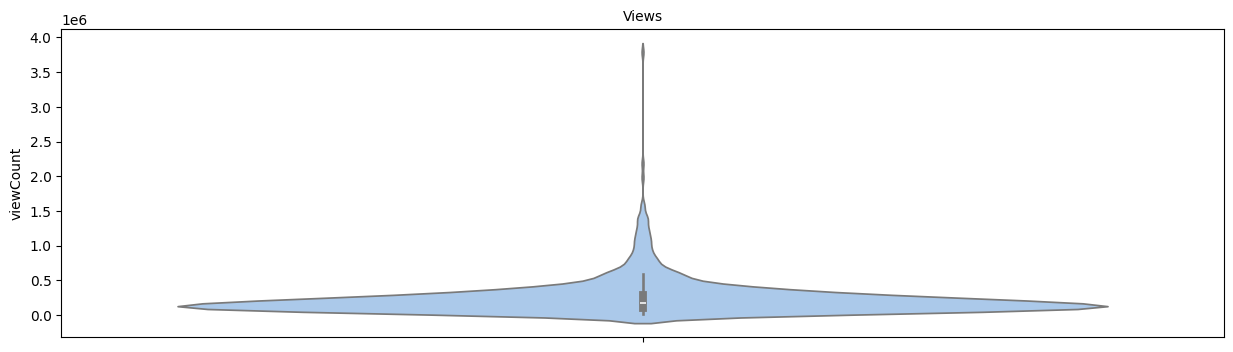

In [22]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.violinplot(df_videos['viewCount'], palette = 'pastel')
plt.title('Views', fontsize = 10)
plt.show()

Lalu bagaimana korelasi antara view, like dan jumlah komentar dan durasi video?

In [23]:
df_videos.corr(numeric_only=True)

,viewCount,likeCount,commentCount,durationSecs
viewCount,1.000000,0.894238,0.809655,0.186929
likeCount,0.894238,1.000000,0.821668,0.136892
commentCount,0.809655,0.821668,1.000000,0.167921
durationSecs,0.186929,0.136892,0.167921,1.000000


Antara view, like dan komentar nilai korelasinya sangat kuat atau mempunyai pengaruh dan bernilai positif. Dapat dikatakan semakin banyak view maka akan semakin banyak like maupun komentar. Sementara itu durasi video nilai korelasinya dengan view, like maupun komentar sangat kecil, mengindikasikan bahwa durasi tidak mempengaruhi jumlah view.

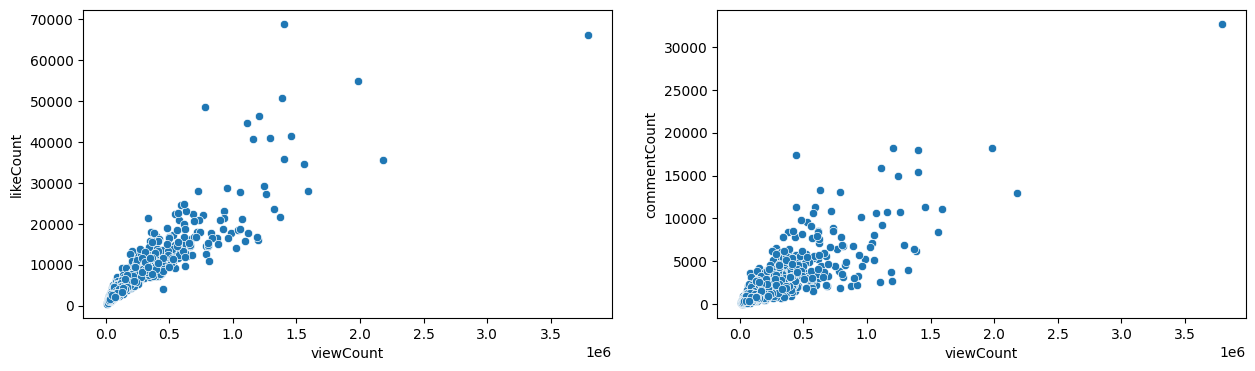

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(data=df_videos, x="viewCount", y="likeCount", ax=ax[0])
sns.scatterplot(data=df_videos, x="viewCount", y="commentCount", ax=ax[1])

plt.show()

Bagaimana untuk melihat jumlah view sehingga terkonversi menjadi like dan komentar? Kita buat nilai rasio per view-nya, misal per 1000 view.

In [35]:
df_videos['likeRatio'] = df_videos['likeCount'] / df_videos['viewCount'] * 1000
df_videos['commentRatio'] = df_videos['commentCount'] / df_videos['viewCount'] * 1000

In [40]:
df_videos[['viewCount', 'likeRatio', 'commentRatio']].corr(numeric_only=True)

,viewCount,likeRatio,commentRatio
viewCount,1.000000,-0.466781,-0.156802
likeRatio,-0.466781,1.000000,0.349288
commentRatio,-0.156802,0.349288,1.000000


Pada saat kita bandingkan view dengan rasio like dan komentar per 1000 view korelasinya menurun. Banyak video yang mendapatkan banyak view tapi sedikit komentar, sebaliknya mendapatkan banyak komentar meskipun sedikit viewnya.
Sedangkan korelasi view terhadap like masih cukup terlihat.

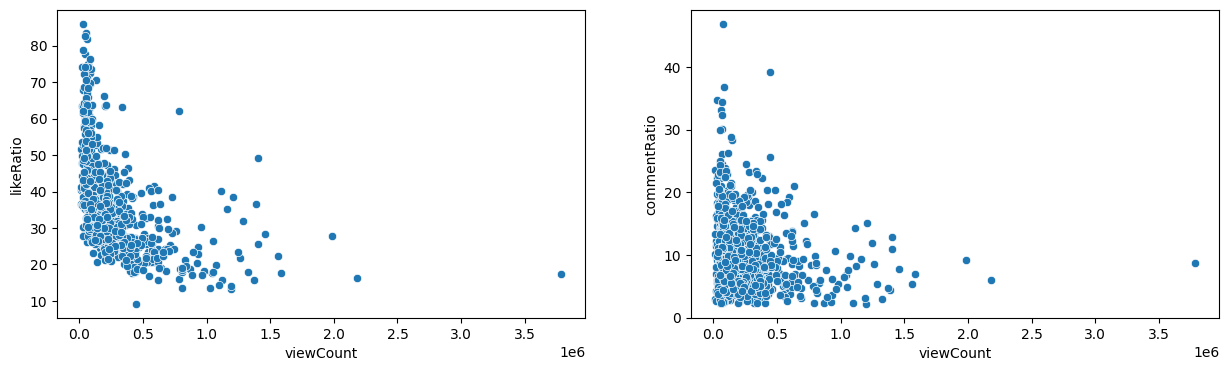

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(data=df_videos, x="viewCount", y="likeRatio", ax=ax[0])
sns.scatterplot(data=df_videos, x="viewCount", y="commentRatio", ax=ax[1])

plt.show()

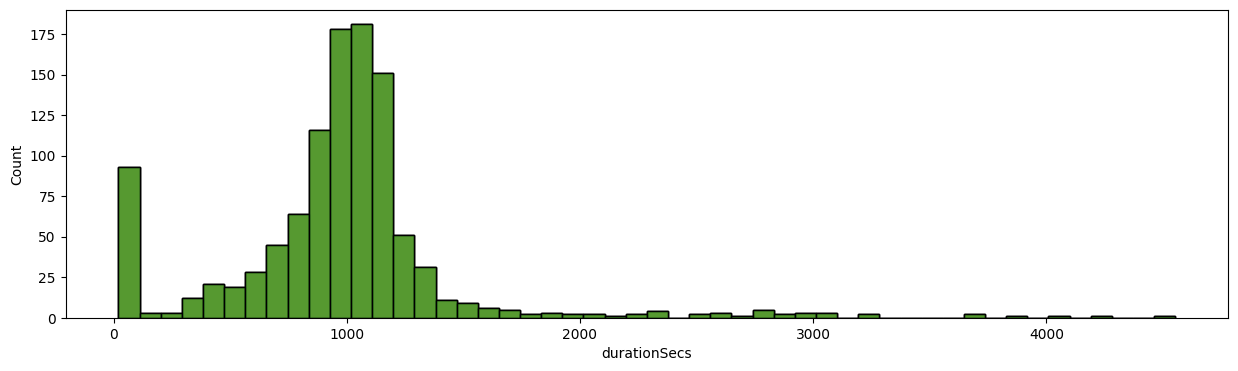

In [43]:
sns.histplot(data=df_videos, x="durationSecs", bins=50)

plt.show()

Kebanyakan durasi video yang dibuat berkisar sekitar 16-an menit. Dan seperti yang kita lihat sebelumnya korelasinya dengan view, like maupun komentar sangat kecil.

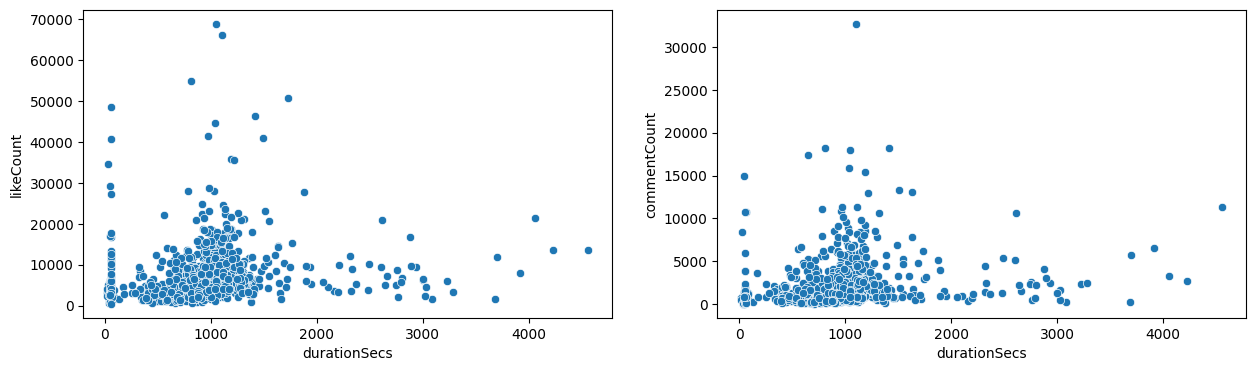

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(data=df_videos, x="durationSecs", y="likeCount", ax=ax[0])
sns.scatterplot(data=df_videos, x="durationSecs", y="commentCount", ax=ax[1])

plt.show()

#### Topik video

In [47]:
df_videos_topics = pd.merge(df_videos, df_topics, how='inner', left_on='video_id', right_on='video_id')

In [50]:
df_videos_topics.groupby(['tags_y'])['video_id'].nunique().nlargest(10).reset_index()

,tags_y,video_id
0,indonesia,135
1,orang,61
2,guru,55
3,islam,48
4,sejarah,43
5,manusia,37
6,agama,35
7,dunia,32
8,misteri,23
9,sekolah,23


Kata Indonesia muncul dalam 135 video, merupakan jumlah terbanyak dibandingkan lainnya.
Dari sepuluh kata teratas channel ini sering membahas topik seputar sejarah, agama, misteri, guru, sekolah. 

In [54]:
topik_count = df_videos_topics.groupby(['tags_y'])['video_id'].nunique().reset_index()

In [ ]:
topik_list = topik_count['tags_y'].to_list()
df_topik_count_views = (df_videos_topics.groupby('tags_y')
                            .agg({'video_id': 'nunique', 'viewCount': 'sum'})
                            .reset_index()
                            .rename(columns={'tags_y': 'topic', 'video_id': 'count videos'})
                        )
df_topik_count_views.nlargest(10, columns=['viewCount']).sort_values('viewCount', ascending=False)

,topic,count videos,viewCount
678,indonesia,135,29934637.0
699,islam,48,17913807.0
1173,orang,61,14016995.0
580,habib,19,13887540.0
575,guru,55,12857902.0
1455,sejarah,43,12652904.0
20,agama,35,10813808.0
434,dunia,32,9315185.0
970,manusia,37,8410651.0
1042,misteri,23,7626330.0


Secara logis semakin banyak topik dibahas maka akan semakin mendapatkan banyak view seperti terlihat pada tabel di atas. 'Indonesia' dengan jumlah 135 video mempunyai view terbanyak 29.934.637, 'Islam' dengan view sebanyak 17.913.807 dan seterusnya.

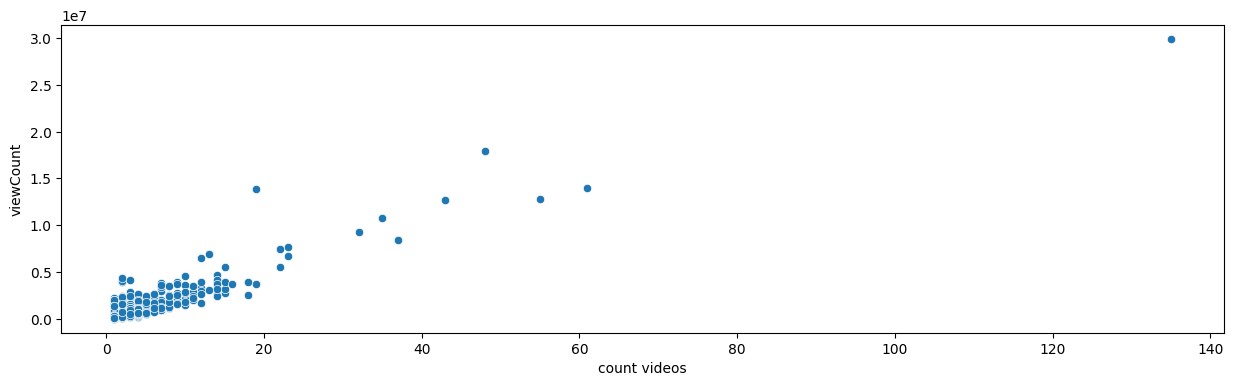

In [69]:
fig = plt.subplots(1, 1, figsize=(15, 4))
sns.scatterplot(data=df_topik_count_views, x="count videos", y="viewCount")

plt.show()

Namun untuk mengetahui topik mana yang disukai dan secara efektif menghasilkan view, maka kita lihat rasio antara view dan jumlah video per topiknya.

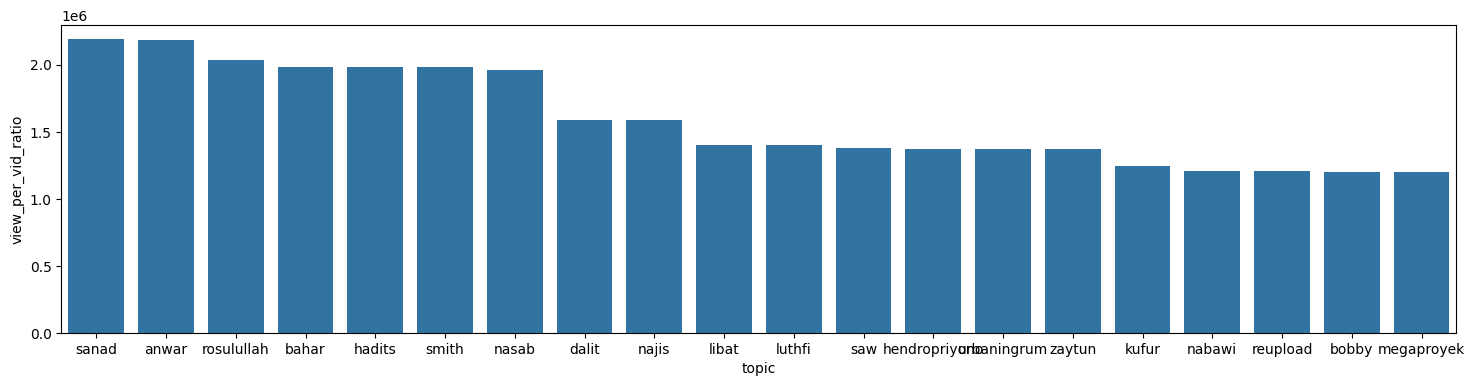

In [ ]:
df_topik_views = (df_videos_topics.groupby('tags_y')
                            .agg({'video_id': 'nunique', 'viewCount': 'sum'})
                            .reset_index()
                            .rename(columns={'tags_y': 'topic', 'video_id': 'count videos'})
                        )

# df_topik_views.sort_values('viewCount', ascending=False).nlargest(10, columns='viewCount')

df_topik_views['view_per_vid_ratio'] = df_topik_views['viewCount'] / df_topik_views['count videos']

fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=df_topik_views.nlargest(20, columns='view_per_vid_ratio'), x="topic", y="view_per_vid_ratio", ax=ax)

plt.show()

In [95]:
print('Top video by topik: ', df_videos_topics[df_videos_topics['tags_y'] == 'sanad'].values[0, 2], '- Total views: ', df_videos_topics[df_videos_topics['tags_y'] == 'sanad'].values[0, 7])
print('Top video by views: ', df_videos[df_videos['viewCount'] == df_videos['viewCount'].max()].values[0, 2], '- Total views: ', df_videos[df_videos['viewCount'] == df_videos['viewCount'].max()].values[0, 7])
print('Top video by likes: ', df_videos[df_videos['likeCount'] == df_videos['likeCount'].max()].values[0, 2], '- Total likes: ', df_videos[df_videos['likeCount'] == df_videos['likeCount'].max()].values[0, 8])
print('Top video by comments: ', df_videos[df_videos['commentCount'] == df_videos['commentCount'].max()].values[0, 2], '- Total comments: ', df_videos[df_videos['commentCount'] == df_videos['commentCount'].max()].values[0, 9])

Top video by topik:  Eps 585 | HABIB BUKAN KETURUNAN ROSULULLAH SAW? KRITIK SANAD NASAB - Total views:  3787417.0
Top video by views:  Eps 585 | HABIB BUKAN KETURUNAN ROSULULLAH SAW? KRITIK SANAD NASAB - Total views:  3787417.0
Top video by likes:  Eps 205 | KENAPA SEKOLAH KRISTEN LEBIH BAIK DARI SEKOLAH ISLAM ?? - Total likes:  68889.0
Top video by comments:  Eps 585 | HABIB BUKAN KETURUNAN ROSULULLAH SAW? KRITIK SANAD NASAB - Total comments:  32712.0


#### Kesimpulan

- Hubungan Views dan Interaksi: Analisis menunjukkan adanya korelasi positif yang kuat antara jumlah views dengan likes dan komentar, mengindikasikan bahwa semakin banyak penonton, semakin tinggi tingkat keterlibatan audiens.
- Profil Durasi Video: Durasi rata-rata video berkisar 16 menit, namun variasi durasi tidak memberikan pengaruh signifikan terhadap metrik kinerja video secara keseluruhan. Meski demikian, video dengan durasi lebih pendek cenderung lebih menarik bagi penonton untuk memberikan likes dan komentar.
- Dominasi Topik Lokal: Konten dengan topik Indonesia mendominasi channel ini, dengan sub-topik seperti sejarah, agama, misteri, pendidikan menjadi fokus utama.
- Efektivitas Topik Keagamaan: Topik-topik keagamaan tertentu, seperti sanad, rosulullah, hadits, dan nasab, terbukti sangat efektif dalam menarik perhatian penonton dan menghasilkan jumlah views yang tinggi.
- Keberhasilan Video Unggulan: Video "Eps 585 | HABIB BUKAN KETURUNAN ROSULULLAH SAW? KRITIK SANAD NASAB" menonjol sebagai video dengan kinerja terbaik, menunjukkan bahwa konten yang kontroversial atau mendalam mengenai topik agama dapat memicu diskusi dan menarik minat audiens yang luas.

#### Saran

- Faktor Keterlibatan Penonton: Jumlah views menjadi indikator yang kuat untuk memprediksi tingkat keterlibatan penonton dalam bentuk likes dan komentar.
- Optimasi Durasi: Meskipun durasi video tidak menjadi faktor penentu utama, namun pertimbangan durasi yang tepat dapat membantu meningkatkan interaksi pada video-video tertentu.
- Niche Pasar: Channel ini telah berhasil menemukan niche pasar yang jelas pada konten bertema Indonesia, khususnya topik-topik keagamaan.
- Strategi Konten yang Efektif: Konten yang membahas isu-isu kontroversial atau mendalam mengenai topik agama terbukti sangat efektif dalam menarik perhatian dan meningkatkan engagement.
- Potensi Pertumbuhan: Hasil analisis ini dapat digunakan sebagai dasar untuk mengembangkan strategi konten yang lebih efektif di masa mendatang, dengan fokus pada topik-topik yang telah terbukti populer dan meningkatkan produksi konten dengan durasi yang lebih optimal.